In [10]:
%matplotlib inline
#
from LRGSG_package.shared import *
from LRGSG_package.LRGSG import move_to_rootf, Lattice2D
move_to_rootf(True)
plt.style.use("ipynb/nb_plotsheet.mplstyle")
#
subDatPth = os.path.join('plot', 'paper', 'suppinf', '')
datPth = os.path.join('data', subDatPth)
subPthStr = ['defects_plots']
datPthDict = {s: os.path.join(datPth, s, '') for s in subPthStr}
for path in datPthDict.values(): os.makedirs(path, exist_ok=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [15]:
side = 128
pflip = 0.1
geometry = 'squared'
cell = 'randZERR'

In [16]:
configurations = [
    (side, True),
    (32, False)
]
#
for i, (side1, pbc) in enumerate(configurations):
    l_tmp = Lattice2D(
        side1=side1,
        geo=geometry,
        pflip=pflip,
        pbc=pbc,
        sgpath=subDatPth,
        with_positions=True
    )
    #
    fliplist = l_tmp.nwDict[cell]['G']
    l_tmp.flip_sel_edges(fliplist)
    l_tmp.compute_k_eigvV()
    #
    if i == 0:
        l = l_tmp
    elif i == 1:
        l_draw = l_tmp

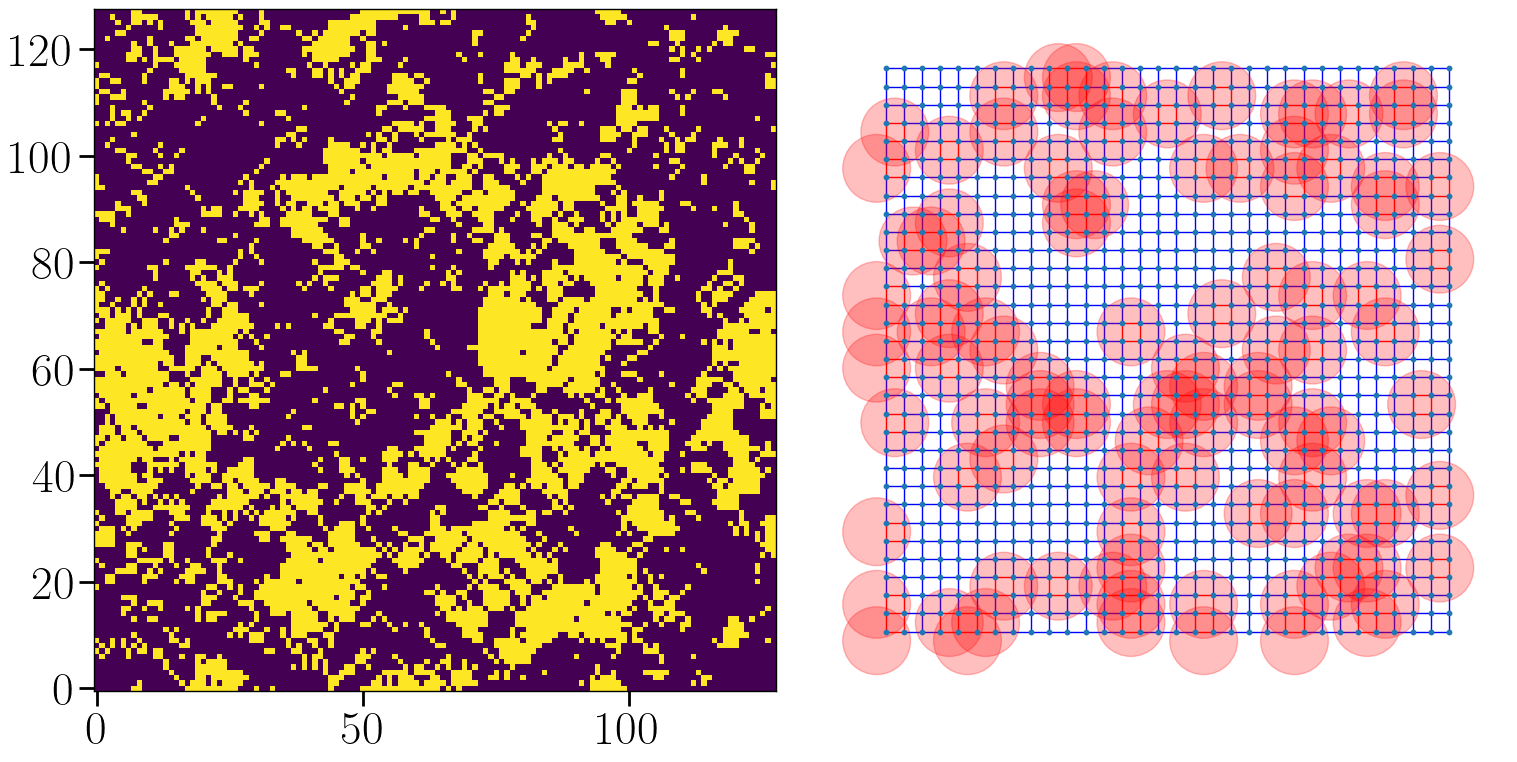

In [17]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(np.sign(l.eigV[0].reshape(l.syshape)))
nx.draw(l_draw.G, pos = l_draw.get_node_pos(), 
    edge_color=l_draw.get_edge_color(), ax=ax[1], node_size=10)
ax[1].set_aspect('equal')
if cell == 'rand':
    for i in l_draw.rEdgeFlip['G']:
        circle_center = (i[0][0]+.5, i[0][1])
        circle = plt.Circle(circle_center, l_draw.r_c, color='red', alpha=0.25)
        ax[1].add_patch(circle)
elif cell == 'randXERR':
    for circle_center in l_draw.nwDict.rNodeFlip['G']:
        circle = plt.Circle(circle_center, l_draw.r_c, color='red', alpha=0.25)
        ax[1].add_patch(circle)
elif cell == 'randZERR':
    for i in l_draw.nwDict.rNodeFlip['G']:
        circle_center = (i[0]-.5, i[1]-.5)
        circle = plt.Circle(circle_center, l_draw.r_c, color='red', alpha=0.25)
        ax[1].add_patch(circle)
fig.tight_layout()
fig.savefig(f"{datPthDict['defects_plots']}{geometry}_{side}_{pflip}_{cell}.pdf", 
    bbox_inches='tight', transparent=True)
# plt.close('all')

In [34]:
rows, cols= 64, 64
p = 0.1
random_matrix = np.random.rand(rows*cols)
binary_matrix = np.where(random_matrix < p, 1, -1)


In [43]:
rows, cols= 128, 128
pinf = []
for p in np.linspace(0.1, 0.9, 50):
    random_matrix = np.random.rand(rows, cols)
    binary_matrix = np.where(random_matrix < p, 1, -1)
    pinf.append(np.abs(np.where(binary_matrix.flatten() == 1)[0].shape[0] / (rows*cols) - np.where(binary_matrix.flatten() == -1)[0].shape[0] / (rows*cols)))

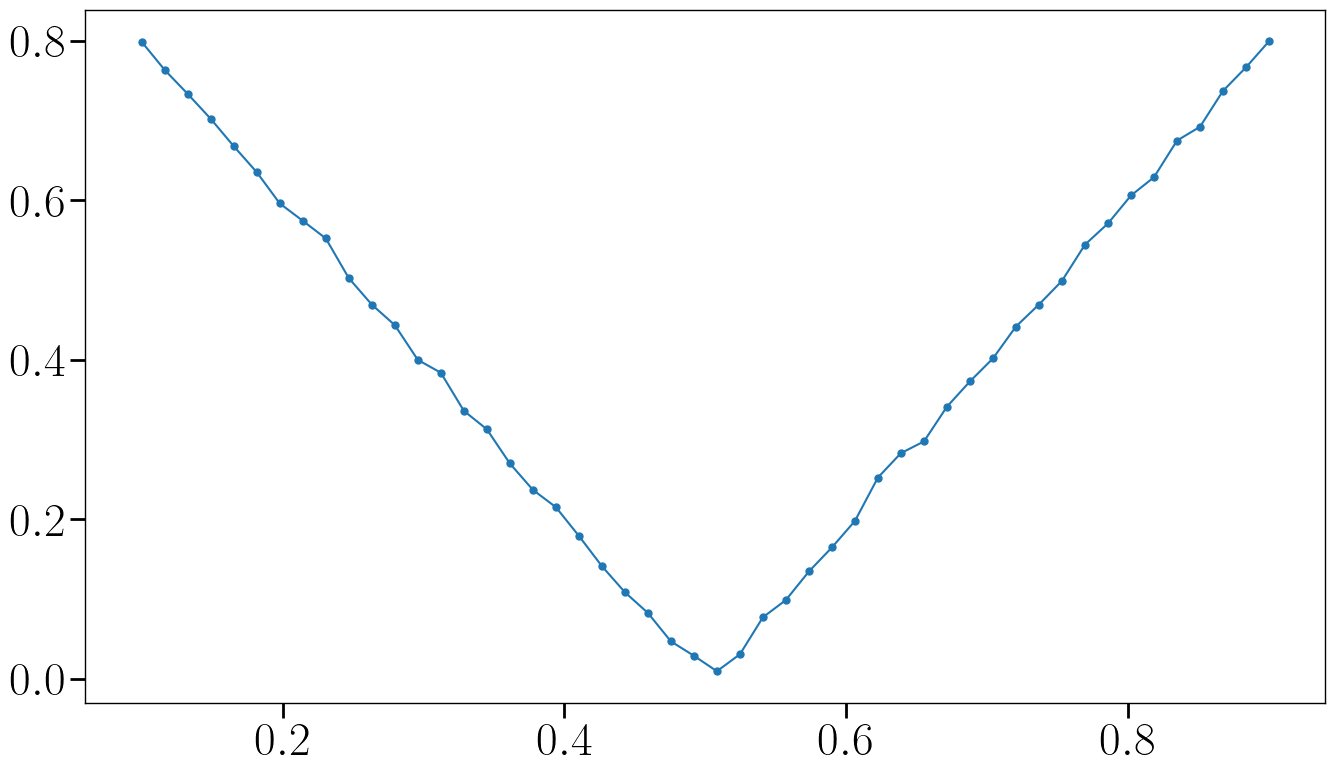

In [45]:
plt.plot(np.linspace(0.1, 0.9, 50), pinf)

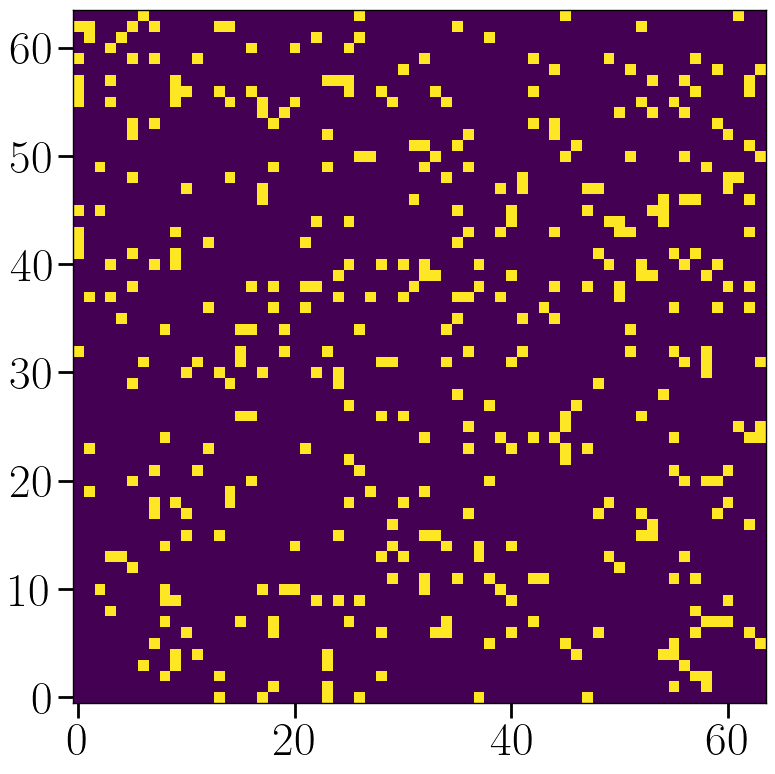

In [33]:
plt.imshow(binary_matrix)

In [18]:
l = Lattice2D(64)
nx.set_node_attributes(l.G, values=random.choices([-1, 1], k=l.G.number_of_nodes()))

AttributeError: 'list' object has no attribute 'items'

In [47]:
l = Lattice2D(2048, pflip=0.001, with_positions=False)
l.flip_sel_edges(l.nwDict['rand']['G'])

In [48]:
l.compute_k_eigvV()